In [11]:
import os
import numpy as np
import pandas as pd
import json
os.environ["NAMESPACE"]="research"
os.environ["PROFILE"]="local"
from agrobrain_util.runtime.evironment import RuntimeEnv
from agrobrain_util.infra.app_config import application_config as cfg

import shutil
import glob
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon

import json
import random
import glob
import datetime
from tqdm import tqdm
from datetime import datetime

from skimage.transform import resize
from skimage.filters import gaussian
import skimage.measure

from PIL import Image

import dtlpy as dl
if dl.token_expired():
    dl.login()

env = RuntimeEnv()

DATA_DIR = "data"

DATASET_NAME = "anafa_2023_06_23_resolution_lim_dataset_1"
VERSION = 0

dataloop_local_data_dir = os.path.join(DATA_DIR, f"dataloop")
annotation_local_path = os.path.join(dataloop_local_data_dir, f"annotations_{DATASET_NAME}_v{VERSION}")

jsons_folder = os.path.join(annotation_local_path, "json")
jsons_paths_list = glob.glob(os.path.join(jsons_folder, "*.json"))
jsons_paths_list = [json_path for json_path in jsons_paths_list if int(os.path.basename(json_path).replace(".json", "")) in images_data['imageID'].values]



images_data = pd.read_csv(os.path.join(DATA_DIR, 'resolution_test', 'resolution_test_images_dataframe_1000_images_full_data_1.csv'))
images_data = images_data[~images_data['wideImageID'].isna()].reset_index(drop=True)

wide_images_data = pd.read_csv((os.path.join(DATA_DIR, "resolution_test", "wide_images_data.csv")))

# example_image_id = 6415975

# example_image_id = 9568380
random_image_id = int(os.path.basename(np.random.choice(jsons_paths_list)).replace(".json", ""))
example_image_id = random_image_id


resized_images_folder = os.path.join("images", "resized_images")

example_wide_image_id = env.eti_api.get_matching_wide_images([example_image_id])[0]
wide_im_path = env.download_image(int(example_wide_image_id))
wide_image = io.imread(wide_im_path)
wide_image_shape = wide_image.shape
wide_image_area_pixels = wide_image_shape[0] * wide_image_shape[1]

wide_images_data['wide_resolution'] = np.sqrt(wide_images_data['footprintArea'] / wide_image_area_pixels) * 1000

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/imageio_plugin.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return np.asarray(imageio_imread(*args, **kwargs))


In [19]:
jsons_paths_list = [json_path for json_path in jsons_paths_list if int(os.path.basename(json_path).replace(".json", "")) in images_data['imageID'].values]
# jsons_df = pd.DataFrame({'jsons_paths': jsons_paths_list})
# jsons_df['image_ids']

# jsons_df['jsons_paths'].isin(wide_images_data['imageID'].values)

In [20]:
len(jsons_paths_list_new)

990

In [17]:
wide_images_data['imageID'].values

array([ 5136964,  5139378,  5139407,  5139922,  5169217,  5188281,
        5188359,  5234511,  5243181,  5244389,  5244983,  5245163,
        5245267,  5246145,  5246229,  5246973,  5247143,  5247155,
        5247437,  5247521,  5247737,  5255721,  5276030,  5279391,
        5282891,  5315438,  5320726,  5321032,  5321961,  5322401,
        5330761,  5361999,  5362030,  5363068,  5363170,  5363300,
        5365580,  5382190,  5404294,  5406855,  5406871,  5406932,
        5407035,  5407053,  5407330,  5407409,  5407500,  5407521,
        5418759,  5434643,  5435098,  5437155,  5437387,  5444385,
        5452285,  5461832,  5462323,  5462395,  5462888,  5463443,
        5468706,  5469444,  5470426,  5471462,  5494426,  5496241,
        5497505,  5497551,  5497703,  5497765,  5497809,  5497923,
        5498849,  5498983,  5500694,  5503324,  5530633,  5531183,
        5540812,  5540841,  5540857,  5585837,  5585958,  5592468,
        5593765,  5596620,  5597287,  5597362,  5597446,  5597

In [16]:
int(os.path.basename(jsons_paths_list[20]).replace(".json", "")) in wide_images_data['imageID'].values

False

In [5]:
len(jsons_paths_list)

0

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/imageio_plugin.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return np.asarray(imageio_imread(*args, **kwargs))


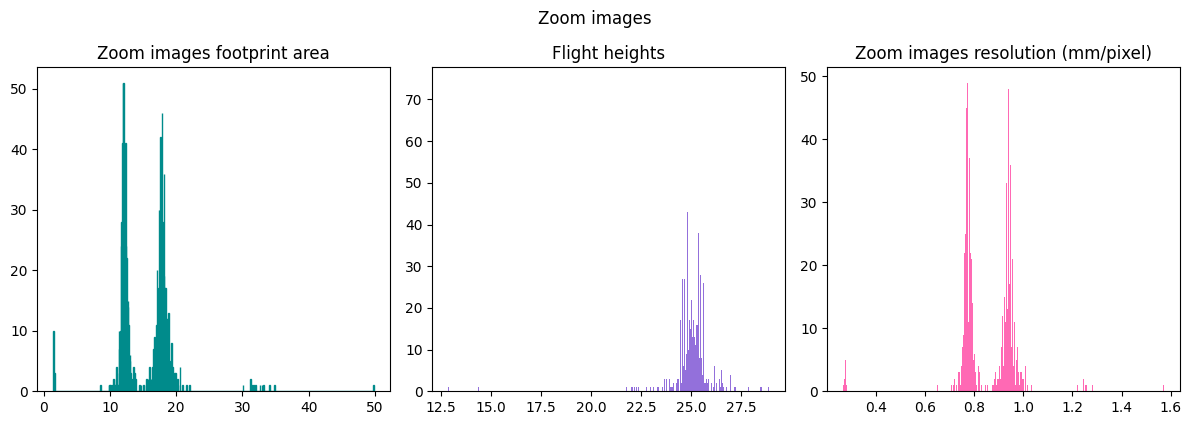

In [3]:
# ZOOM IMAGES HISTOGRAMS

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

example_image_id = int(os.path.basename(jsons_paths_list[0]).replace(".json", ""))
im_path = env.download_image(int(example_image_id))
image = io.imread(im_path)
image_shape = image.shape
image_area_pixels = image_shape[0] * image_shape[1]


axs[0].hist(images_data['footprintArea'], bins=500, edgecolor='darkcyan')
axs[0].set_title('Zoom images footprint area')

axs[1].hist([images_data['heightAboveGround']], bins=500, color = 'mediumpurple')
axs[1].set_title('Flight heights')

images_data['zoom_resolution'] = np.sqrt(images_data['footprintArea'] / image_area_pixels) * 1000
axs[2].hist(images_data['zoom_resolution'], bins=500, color='hotpink')
axs[2].set_title('Zoom images resolution (mm/pixel)')

plt.tight_layout()
plt.suptitle('Zoom images', y=1.05)
plt.show()

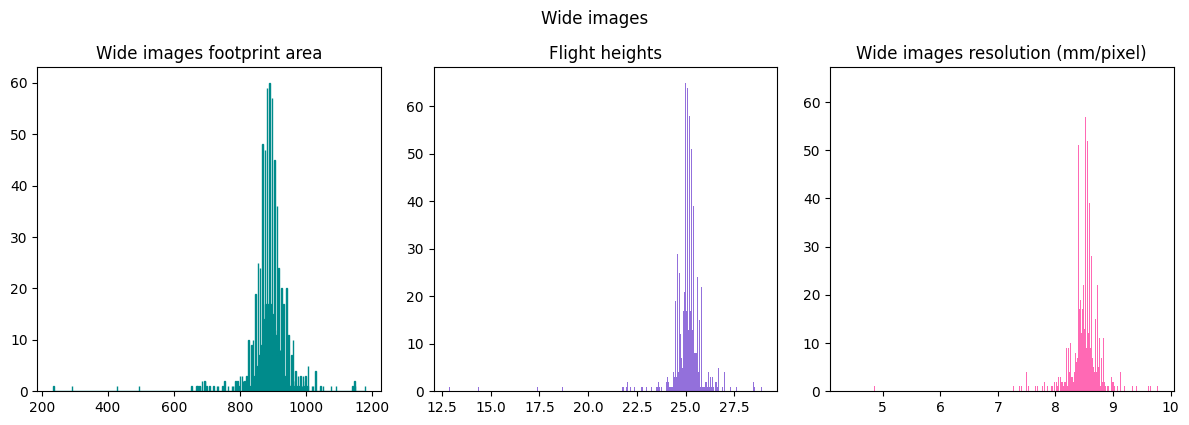

In [4]:
# WIDE IMAGES HISTOGRAMS

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

example_zoom_image_id = int(os.path.basename(jsons_paths_list[0]).replace(".json", ""))

example_wide_image_id = env.eti_api.get_matching_wide_images([example_zoom_image_id])[0]
wide_im_path = env.download_image(int(example_wide_image_id))
wide_image = io.imread(wide_im_path)
wide_image_shape = wide_image.shape
wide_image_area_pixels = wide_image_shape[0] * wide_image_shape[1]

axs[0].hist(wide_images_data['footprintArea'], bins=500, edgecolor='darkcyan')
axs[0].set_title('Wide images footprint area')

axs[1].hist([wide_images_data['heightAboveGround']], bins=500, color = 'mediumpurple')
axs[1].set_title('Flight heights')

wide_images_data['wide_resolution'] = np.sqrt(wide_images_data['footprintArea'] / wide_image_area_pixels) * 1000
axs[2].hist(wide_images_data['wide_resolution'], bins=500, color='hotpink')
axs[2].set_title('Wide images resolution (mm/pixel)')

plt.tight_layout()
plt.suptitle('Wide images', y=1.05)
plt.show()

In [32]:
# SINGLe IMAGE: CALCULATE RESOLUTION FROM IMAGE DATA (HEIGHT AND FOCAL LENGTH)

F = 24 # mm
CCD_X = 35 # mm
CCD_Y = 26.3 # mm
IMAGE_X_PX = 5184 # px
image_y_px = 3888 # px

def get_image_resolution(flight_height, focal_length):
    fp_x_m = (flight_height / focal_length) * CCD_X # m
    fp_y_m = (flight_height / focal_length) * CCD_Y # m
    # total_ground_area = fp_x_m * fp_y_m # m^2
    resolution = 0.5*(fp_x_m/IMAGE_X_PX + fp_y_m/image_y_px)*1000 # mm/px
    return resolution


random_image_id = int(os.path.basename(np.random.choice(jsons_paths_list)).replace(".json", ""))
random_image_data = images_data[images_data['imageID'] == random_image_id]
flight_height = random_image_data['heightAboveGround'].values[0] # m
focal_length = random_image_data['focalLength'].values[0] # mm
image_resolution = get_image_resolution(flight_height, focal_length)

print(f"Image ID: {random_image_id} resolution: {image_resolution}")



Image ID: 6471781 resolution: 0.9110195984812315


In [15]:
# CALCULATE RESOLUTION TO ALL ZOOM IMAGES

F = 24 # mm
CCD_X = 35 # mm
CCD_Y = 26.3 # mm
IMAGE_X_PX = 5184 # px
IMAGE_Y_PX = 3888 # px


def get_image_resolution(flight_height, focal_length):
    fp_x_m = (flight_height / focal_length) * CCD_X # m
    fp_y_m = (flight_height / focal_length) * CCD_Y # m
    # total_ground_area = fp_x_m * fp_y_m # m^2
    resolution = 0.5*(fp_x_m/IMAGE_X_PX + fp_y_m/image_y_px)*1000 # mm/px
    return resolution


# resolution_list = []
# for image_id in images_data['imageID']:
#     flight_height = images_data[images_data['imageID']==image_id]['heightAboveGround'].values[0] # m
#     focal_length = images_data[images_data['imageID']==image_id]['focalLength'].values[0] # mm
#     image_resolution = get_image_resolution(flight_height, focal_length)

# images_data['resolution'] = resolution_list

In [4]:
# RESOLUTION CALCULATION FROM HEIGHT AND FOCAL LENGTH

F = 24 # mm
CCD_X = 35 # mm
CCD_Y = 26.3 # mm
IMAGE_X_PX = 5184 # px
IMAGE_Y_PX = 3888 # px

def get_new_x_y_px(resolution, new_resolution):
    x_px = int(resolution/new_resolution * IMAGE_X_PX)
    # print(f"resolution deviation: {resolution/new_resolution}")
    y_px = int(resolution/new_resolution * IMAGE_Y_PX)
    return x_px, y_px


def get_image_resolution(height, focal_length):
    fp_x_m = (height / focal_length) * CCD_X # m
    fp_y_m = (height / focal_length) * CCD_Y # m
    # total_ground_area = fp_x_m * fp_y_m # m^2
    resolution = 0.5*(fp_x_m/IMAGE_X_PX + fp_y_m/IMAGE_Y_PX)*1000 # mm/px
    return resolution, fp_x_m, fp_y_m


# random_image_id = int(os.path.basename(np.random.choice(jsons_paths_list)).replace(".json", ""))
random_image_id = 9568380
random_image_data = images_data[images_data['imageID'] == random_image_id]

im_path = env.download_image(random_image_id)
original_image = io.imread(im_path)

flights_heights_options = np.arange(20, 55, 5)

focal_length = random_image_data['focalLength'].values[0]
flight_height = random_image_data['heightAboveGround'].values[0]
image_resolution, fp_x_m, fp_y_m = get_image_resolution(flight_height, focal_length)
print(f"image_resolution: {image_resolution:.2f}")
resolutions_dict = {}
for h in flights_heights_options:
    new_image_resolution, new_fp_x_m, new_fp_y_m = get_image_resolution(h, focal_length)
    image_x_px_new, image_y_px_new = get_new_x_y_px(image_resolution, new_image_resolution)
    resolutions_dict[h] = [image_x_px_new, image_y_px_new]

    print(f"height: {h}")
    print(f"image_new_resolution:{new_image_resolution:.2f}")
    # print(f"original_fp_x_m: {fp_x_m:.2f}, original_fp_y_m: {fp_y_m:.2f}")
    # print(f"new_fp_x_m: {new_fp_x_m:.2f},new_fp_y_m: {new_fp_y_m:.2f}")
    print(f"new image shape: ({image_x_px_new, image_y_px_new})")
    # print("\n")



image_resolution: 0.95
height: 20
image_new_resolution:0.75
new image shape: ((6618, 4963))
height: 25
image_new_resolution:0.93
new image shape: ((5294, 3971))
height: 30
image_new_resolution:1.12
new image shape: ((4412, 3309))
height: 35
image_new_resolution:1.31
new image shape: ((3781, 2836))
height: 40
image_new_resolution:1.49
new image shape: ((3309, 2481))
height: 45
image_new_resolution:1.68
new image shape: ((2941, 2206))
height: 50
image_new_resolution:1.87
new image shape: ((2647, 1985))


# Show images - different resolutions

In [8]:
#  CREATE RESOLUTION DICTIONARY FROM WIDE IMAGES HEIGHTS

F = 24 # mm
CCD_X = 35 # mm
CCD_Y = 26.3 # mm
IMAGE_X_PX_WIDE = wide_image.shape[1]
IMAGE_Y_PX_WIDE = wide_image.shape[0]

def get_wide_image_resolution(height, focal_length=F):
    fp_x_m = (height / focal_length) * CCD_X # m
    fp_y_m = (height / focal_length) * CCD_Y # m
    # total_ground_area = fp_x_m * fp_y_m # m^2
    resolution = 0.5*(fp_x_m/IMAGE_X_PX_WIDE + fp_y_m/IMAGE_Y_PX_WIDE)*1000 # mm/px
    return resolution

resolution_dict = {}
step_size = 5
heights_options = np.arange(20, 45, step_size)
for h in heights_options:
    resolution_dict[h] = get_wide_image_resolution(h, F)
resolution_dict

{20: 7.200211296238624,
 25: 9.000264120298281,
 30: 10.800316944357936,
 35: 12.60036976841759,
 40: 14.400422592477248}

In [35]:
# RESIZE ALL IAMGES FROM JSON_PATH_LIST

resized_images_folder = os.path.join("images", "resized_images")
os.makedirs(resized_images_folder, exist_ok=True)


for im_json_path in tqdm(jsons_paths_list):
    image_id = int(os.path.basename(im_json_path).replace(".json", ""))
    image_data = images_data[images_data['imageID'] == example_image_id]
    im_path = env.download_image(example_image_id)
    original_image = io.imread(im_path)


    focal_length = image_data['focalLength'].values[0]
    flight_height = image_data['heightAboveGround'].values[0]
    zoom_image_resolution, fp_x_m, fp_y_m = get_image_resolution(flight_height, focal_length)
    wide_im_id = int(images_data['wideImageID'][0])

    if wide_im_id not in wide_images_data['imageID'].values:
        print("1")
        continue

    wide_image_resolution = wide_images_data[wide_images_data['imageID']==wide_im_id]['wide_resolution'].values[0]

    for i, h in enumerate(resolution_dict.keys()):
        resized_image_shape = get_new_x_y_px(zoom_image_resolution, resolution_dict[h])
        # print(resolution_dict[h], resized_image_shape)
        processed_image_name = f"{example_image_id}_{i}_h_{h}_resolution_{resolution_dict[h]:.2f}.jpg"
        processed_image_path = os.path.join(resized_images_folder, processed_image_name)
        processed_image = resize(original_image, (resized_image_shape[0], resized_image_shape[1], 3), anti_aliasing=True)
        processed_image = resize(processed_image, (original_image.shape[0], original_image.shape[1]), mode='constant', anti_aliasing=False)
        # processed_image = (image_data * 255).astype(np.uint8) 
        io.imsave(processed_image_path, processed_image)
        processed_image = None
    
    

  0%|          | 0/1000 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
  0%|          | 0/1000 [00:28<?, ?it/s]


KeyboardInterrupt: 

In [16]:
# SAVE IMAGES AFTER CHANGING RESOLUTION BY RESOLUTION DICT - EXAMPLE IMAGE ID

F = 24 # mm
CCD_X = 35 # mm
CCD_Y = 26.3 # mm
IMAGE_X_PX = 5184 # px
IMAGE_Y_PX = 3888 # px

def get_new_x_y_px(resolution, new_resolution):
    x_px = int(resolution/new_resolution * IMAGE_X_PX)
    # print(f"resolution deviation: {resolution/new_resolution}")
    y_px = int(resolution/new_resolution * IMAGE_Y_PX)
    return x_px, y_px


def get_image_resolution(height, focal_length):
    fp_x_m = (height / focal_length) * CCD_X # m
    fp_y_m = (height / focal_length) * CCD_Y # m
    # total_ground_area = fp_x_m * fp_y_m # m^2
    resolution = 0.5*(fp_x_m/IMAGE_X_PX + fp_y_m/IMAGE_Y_PX)*1000 # mm/px
    return resolution, fp_x_m, fp_y_m


# random_image_id = int(os.path.basename(np.random.choice(jsons_paths_list)).replace(".json", ""))
example_image_id = 9568380
example_image_data = images_data[images_data['imageID'] == example_image_id]

im_path = env.download_image(example_image_id)
original_image = io.imread(im_path)


focal_length = example_image_data['focalLength'].values[0]
flight_height = example_image_data['heightAboveGround'].values[0]
zoom_image_resolution, fp_x_m, fp_y_m = get_image_resolution(flight_height, focal_length)
print(f"zoom image_resolution: {zoom_image_resolution:.2f}")


wide_im_id = int(example_image_data['wideImageID'])

wide_image_resolution = wide_images_data[wide_images_data['imageID']==wide_im_id]['wide_resolution'].values[0]

resized_images_folder = os.path.join("images", "resized_images")
os.makedirs(resized_images_folder, exist_ok=True)



for i, h in enumerate(resolution_dict.keys()):
    resized_image_shape = get_new_x_y_px(zoom_image_resolution, resolution_dict[h])
    print(resolution_dict[h], resized_image_shape)
    processed_image_name = f"{example_image_id}_{i}_h_{h}_resolution2_{resolution_dict[h]:.2f}.jpg"
    processed_image_path = os.path.join(resized_images_folder, processed_image_name)
    processed_image = resize(original_image, (resized_image_shape[0], resized_image_shape[1], 3), anti_aliasing=True)
    processed_image = resize(processed_image, (original_image.shape[0], original_image.shape[1]), mode='constant', anti_aliasing=False)

    io.imsave(processed_image_path, processed_image)
    processed_image = None


zoom image_resolution: 0.95


NameError: name 'resolution_dict' is not defined

In [20]:
random_image_id = int(os.path.basename(np.random.choice(jsons_paths_list)).replace(".json", ""))
example_image_id = random_image_id

Zoom image id: 9568380


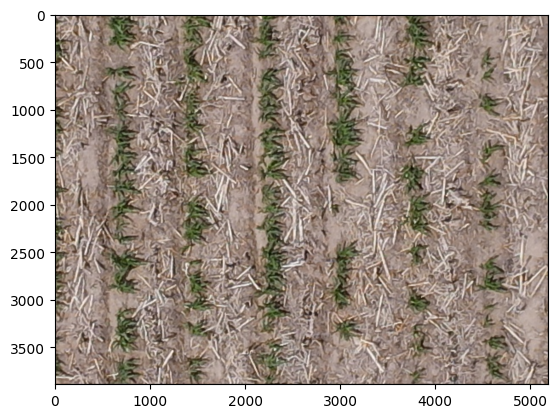

In [4]:
# CROP WIDE IMAGE IN THE MIDDLE

def crop_wide_image(im, frac = 10):
    im_path = env.download_image(int(example_image_id))
    image = io.imread(im_path)
    im_id = env.eti_api.get_matching_wide_images([example_image_id])
    im_path = env.download_image(int(im_id[0]))

    im = io.imread(im_path)
    im_width = im.shape[0]
    im_height = im.shape[1]
    crop_width = im_width // 7
    crop_height = im_height // 7
    left = (im_width - crop_width) // 2
    top = (im_height - crop_height) // 2 
    right = left + crop_width
    bottom = top + crop_height
    cropped_image = im[left:right, top:bottom]
    plt.imshow(cropped_image)
    return cropped_image

# example_image_id = 6500648

im_path = env.download_image(example_image_id)
original_image = io.imread(im_path)

print(f"Zoom image id: {example_image_id}")
cropped_wide_image = crop_wide_image(example_image_id)
cropped_wide_image = resize(cropped_wide_image, (original_image.shape[0], original_image.shape[1]), mode='constant', anti_aliasing=False)
cropped_wide_image_name = f"{example_image_id}_matching_wide_cropped.jpg"
# cropped_wide_image_path = os.path.join(resized_images_folder, cropped_wide_image_name)
# io.imsave(cropped_wide_image_path, cropped_wide_image)
plt.imshow(cropped_wide_image)

In [23]:
len(axs.flatten()), len(images_resolutions_paths_list)

(8, 5)

(3888, 5184, 3)
(3888, 5184, 3)
(3888, 5184, 3)
(3888, 5184, 3)
(3888, 5184, 3)
(3888, 5184, 3)


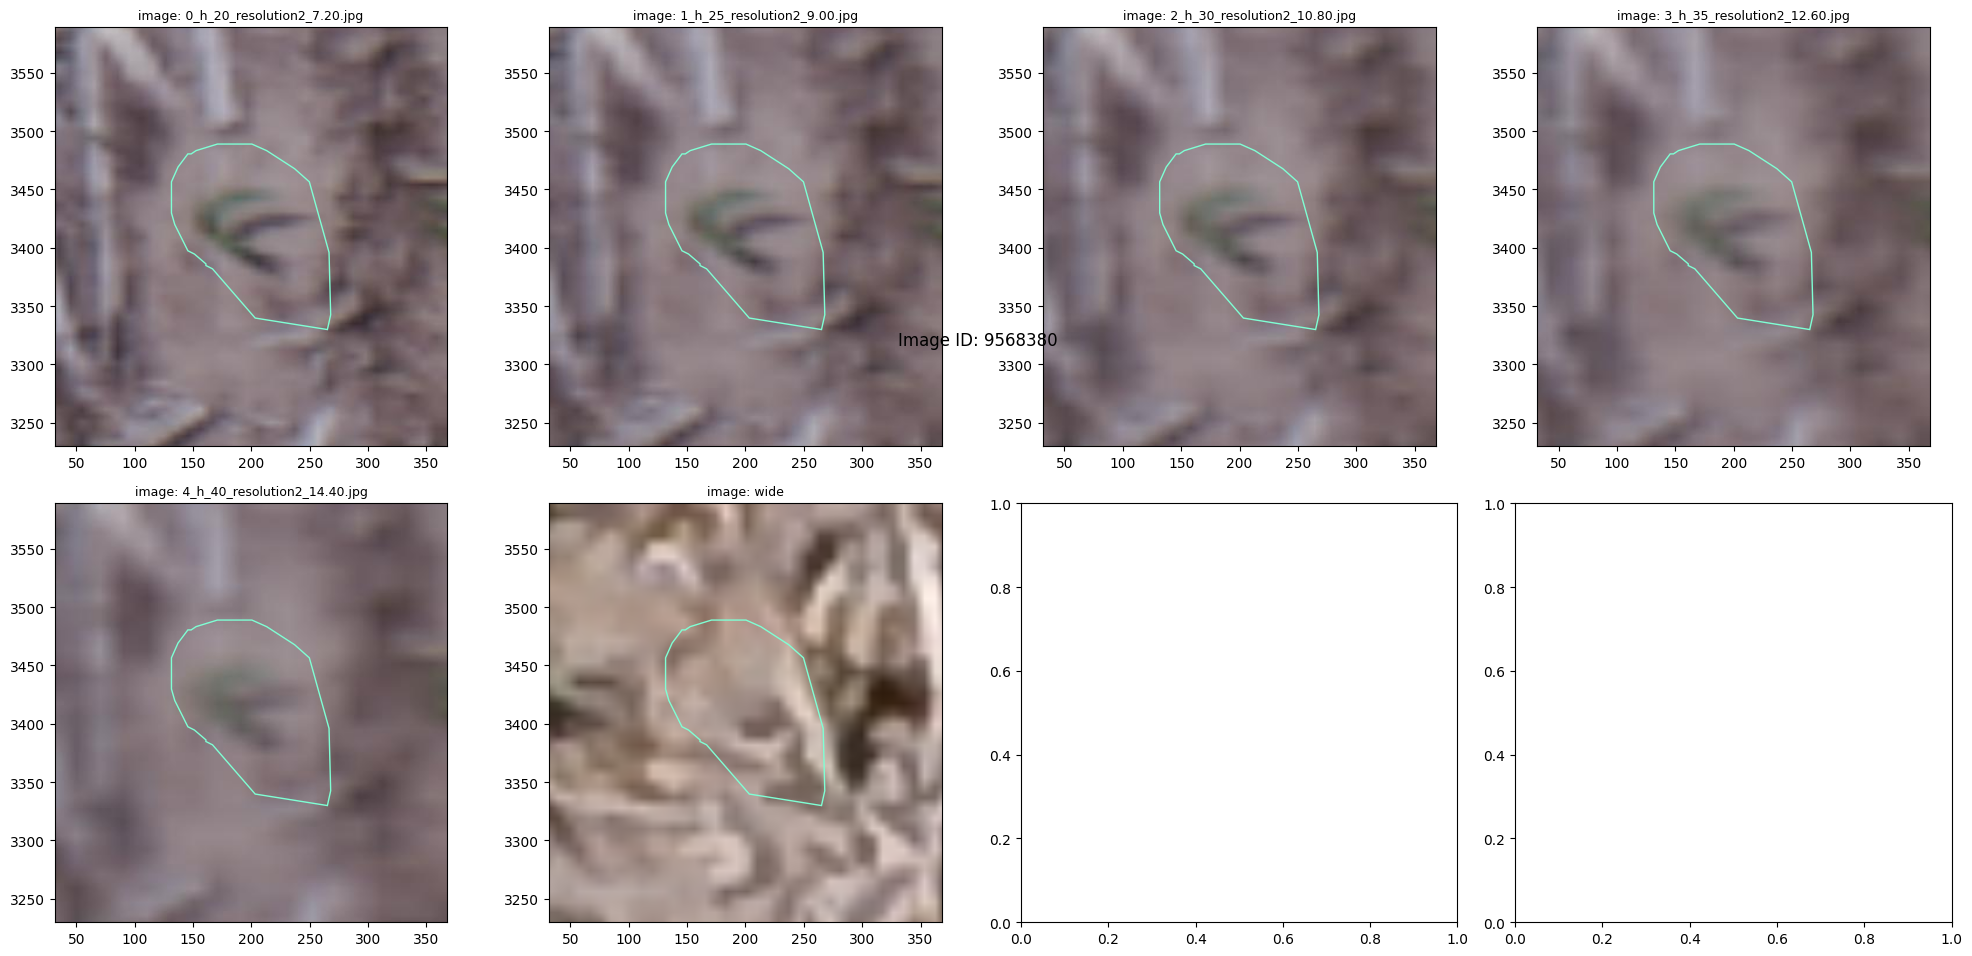

In [27]:
# DISPLAY ONE POLYGON ON DIFFERENT RESOLUTION IMAGES NEXT TO WIDE IMAGE

# example_image_id = random_image_id
# example_image_id = 7843185
# example_image_id = 6415975
CHOSEN_TAG = 1

# example_json_path = "data/dataloop_jsons/6415975.json"
example_json_path = f"data/dataloop/annotations_anafa_2023_06_23_resolution_lim_dataset_1_v0/json/{example_image_id}.json"
images_resolutions_paths_list = glob.glob(os.path.join(resized_images_folder, f"{example_image_id}*resolution2*.jpg"))
# images_resolutions_paths_list = [images_resolutions_paths_list[0], images_resolutions_paths_list[-2], images_resolutions_paths_list[-1]]


with open(example_json_path) as file:
    example_data = json.load(file)

example_polygon_coordinates = example_data['annotations'][0]['coordinates']
# im_path = env.download_image(int(example_image_id))

x_values = [coord['x'] for coord in example_data['annotations'][CHOSEN_TAG]['coordinates'][0]]
y_values = [coord['y'] for coord in example_data['annotations'][CHOSEN_TAG]['coordinates'][0]]
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

num_images = len(images_resolutions_paths_list) + 1
num_rows = (num_images+3) // 4  # Divide and round up
num_cols = min(num_images, 4)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# axs = axs.flatten()

for i in range(len(images_resolutions_paths_list)+1):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axs[row_index, col_index]
    if i == len(images_resolutions_paths_list):
        image = cropped_wide_image
        subtitle = "wide"
        print(image.shape)
    else:
        image = io.imread(images_resolutions_paths_list[i])
        subtitle = images_resolutions_paths_list[i].replace(f"{example_image_id}_", "")
        print(image.shape)


    polygon = patches.Polygon(list(zip(x_values, y_values)), closed=True, fill=None, edgecolor='aquamarine')
    ax.imshow(image)
    ax.add_patch(polygon)

    ax.set_xlim(min(x_values)-100, max(x_values)+100)
    ax.set_ylim(min(y_values)-100, max(y_values)+100)

    ax.set_title(f"image: {os.path.basename(subtitle)}", fontsize=9)


fig.suptitle(f"Image ID: {example_image_id}", y=0.63)
fig.tight_layout()

plt.show()

